# Sistemas de Segundo Orden

##### Version 0.1

`Contenido Original creado por Ezequiel Leonardo Castaño`

<font color='Firebrick'>Este contenido está en <b>borrador</b> y puede estar incompleto y/o sufrir modificaciones</font>
___

<nav style="display: flex;justify-content: space-evenly;">
    <a href="https://elc.github.io/control"><img src="https://img.shields.io/badge/Book-Chapters-blue?style=for-the-badge&amp;logo=GitBook&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab"><img src="https://img.shields.io/badge/Github-Repo-green?style=for-the-badge&amp;logo=github&amp;logoColor=white"></a>
    <a href="https://github.com/ELC/control-theory-with-matlab/issues"><img src="https://img.shields.io/badge/Github%20Issues-Questions-orange?style=for-the-badge"></a>
</nav>

<br><nav style="display: flex; justify-content: space-between;">
    <a href="https://elc.github.io/link/control_03"><img src="https://img.shields.io/badge/%20%20%3C%20Previous%20Chapter--grey?style=for-the-badge"></a>
    <a href="https://elc.github.io/link/control_05"><img src="https://img.shields.io/badge/Next%20Chapter%20%3E--grey?style=for-the-badge"></a>
</nav>

In [ ]:
%plot inline --format=png -w 1600 -h 500

In [2]:
format compact;

# Sistemas de Segundo Orden

Dado un Porcentaje de Overshoot (PO)

In [3]:
PO = 15

PO =
    15



## Calculando ζ

Despejamos el factor de amortiguanmiento relativo de la fórmula de overshoot

Se definen las dos variables

In [4]:
overshoot = sym("PO", 'positive'); 
zeta = sym("zeta", 'positive');

Se escribe la fómula de overshoot relativo

In [5]:
overshoot_equation = overshoot == exp((-zeta * pi) / sqrt(1 - zeta^2));

Se despeja y se muestra la solución

In [6]:
zeta_equation = simplify(solve(overshoot_equation, zeta, 'Real', true));

> In sym/solve>warnIfParams (line 478)
  In sym/solve (line 357)



In [7]:
pretty(zeta_equation)

        |log(PO)|
-------------------------
        2          0.5000
(log(PO)  + 9.8696)




Se escribe la fórmula en código y se calcula ζ

In [8]:
zeta = abs(log(PO/100)) / sqrt(pi^2 + log(PO/100)^2)

zeta =
    0.5169



## Definiendo sistema de Segundo Orden

Se asume un valor arbitrario para ω

In [9]:
omega = 3;

Se define la variable de la función de transferencia $s$

In [10]:
s = tf("s");

Ecuación general para un sistema de segundo orden en el plano $s$

In [28]:
segundo_orden = omega^2 / (s^2 + 2*omega*zeta*s + omega^2)


segundo_orden =
 
          9
  -----------------
  s^2 + 3.102 s + 9
 
Continuous-time transfer function.




### Respuesta escalón

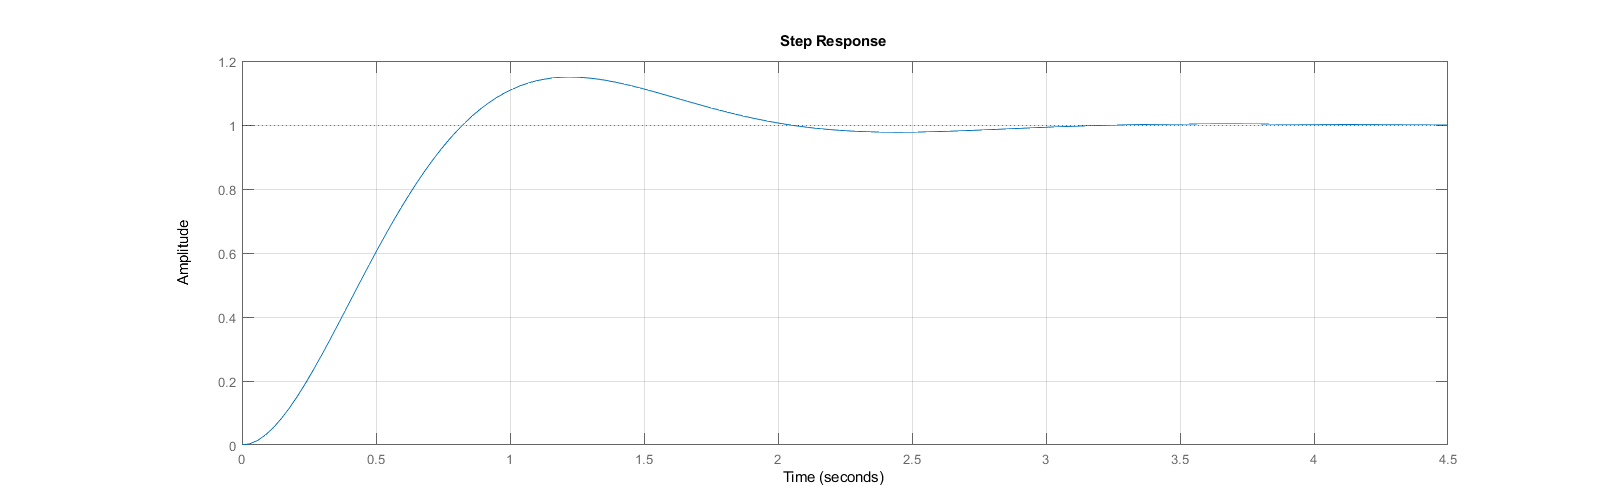

In [29]:
figure;
step(segundo_orden)
grid on

### Conversión a Polos y Ceros

In [30]:
[polos, ceros] = pzmap(segundo_orden);
polos, ceros

polos =
  -1.5508 + 2.5681i
  -1.5508 - 2.5681i
ceros =
  0x1 empty double column vector



## Medidas de Rendimiento

### Valor en Estado estable

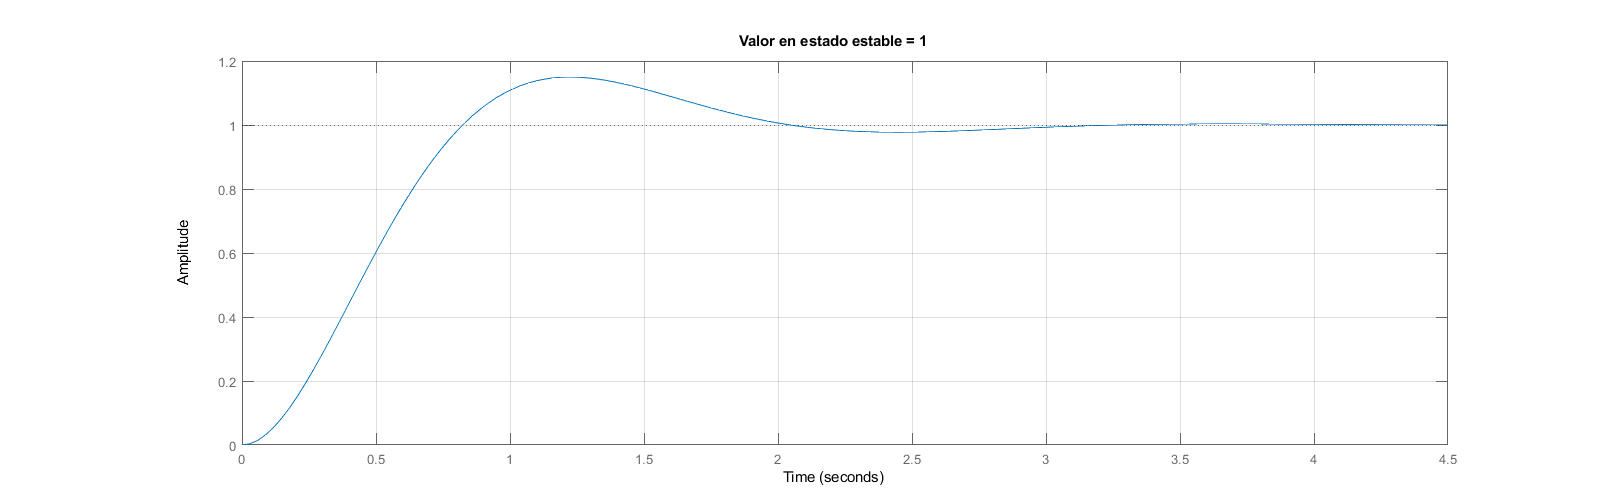

In [31]:
figure;
[y, t] = step(segundo_orden);
step(segundo_orden) % No encontré otra forma de ocultar salida y hacer plot
title("Valor en estado estable = " + num2str(round(y(end)), 2));
grid on

### Delay Time

Tiempo hasta llegar al 50% del valor estable

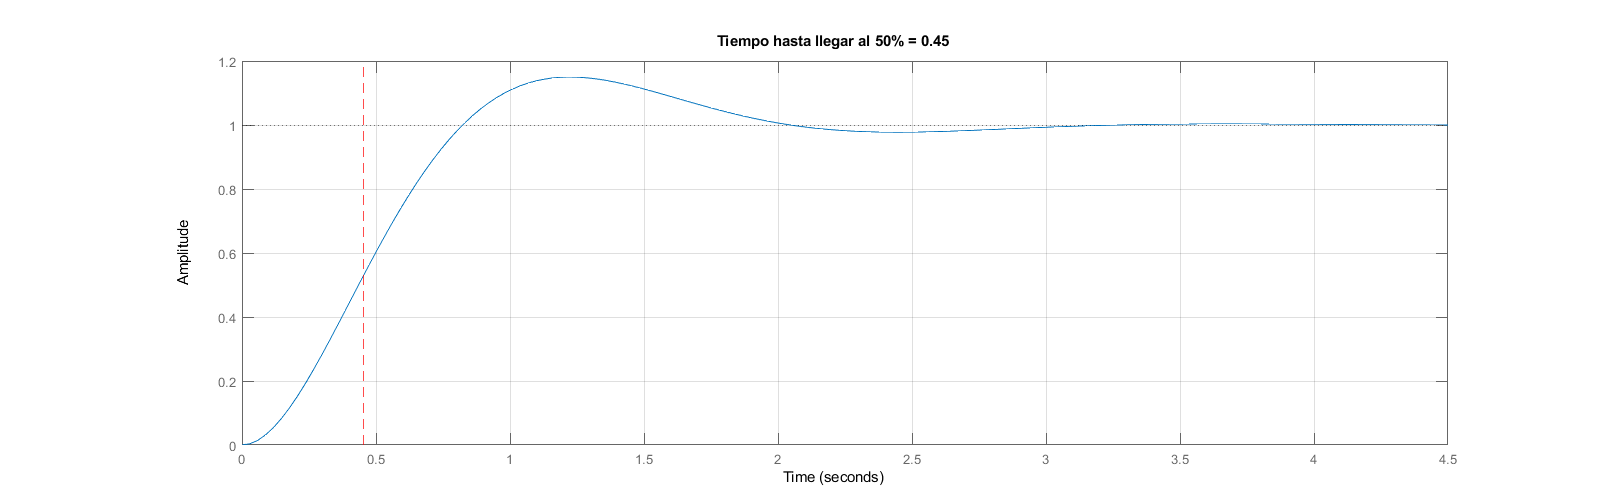

In [33]:
figure;
tiempo_delay =  (1 + 0.7 * zeta) / omega; % Aproximación
step(segundo_orden)
xline(tiempo_delay,'--r');
title("Tiempo hasta llegar al 50% = " + num2str(round(tiempo_delay, 2)))
grid on

### Frecuencia Amortiguada y Ángulo del polo

Varias medidas se expresan en función de la frecuencia amortiguada en vez de la frecuencia natural o utilizan el argumento del polo complejo o ángulo al eje real

In [34]:
frecuencia_amortiguada = omega * sqrt(1 - zeta^2)

frecuencia_amortiguada =
    2.5681



In [35]:
angulo_polo = acos(zeta)

angulo_polo =
    1.0275



### Tiempo de Levantamiento

Tiempo hasta pasar por el valor en estado estable

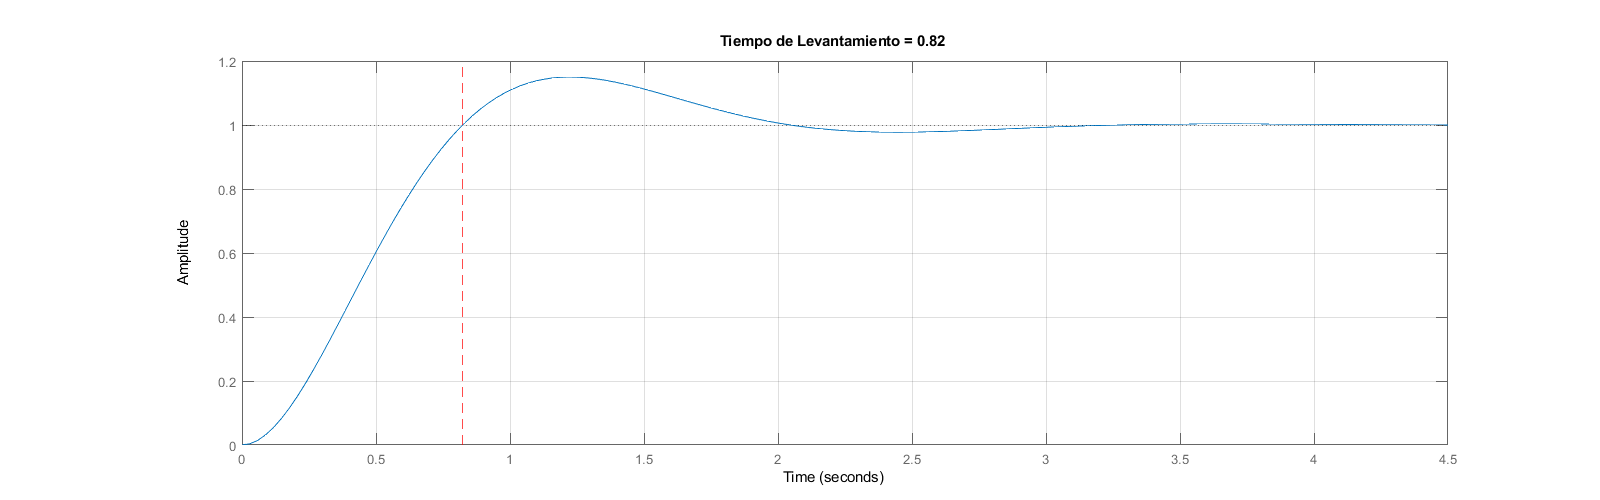

In [38]:
tiempo_levantamiento = (pi - angulo_polo) / frecuencia_amortiguada;

figure;
step(segundo_orden)
xline(tiempo_levantamiento,'--r');
title("Tiempo de Levantamiento = " + num2str(round(tiempo_levantamiento, 2)))
grid on

### Tiempo del pico

Tiempo hasta alcanzar el valor máximo o el valor de overshoot

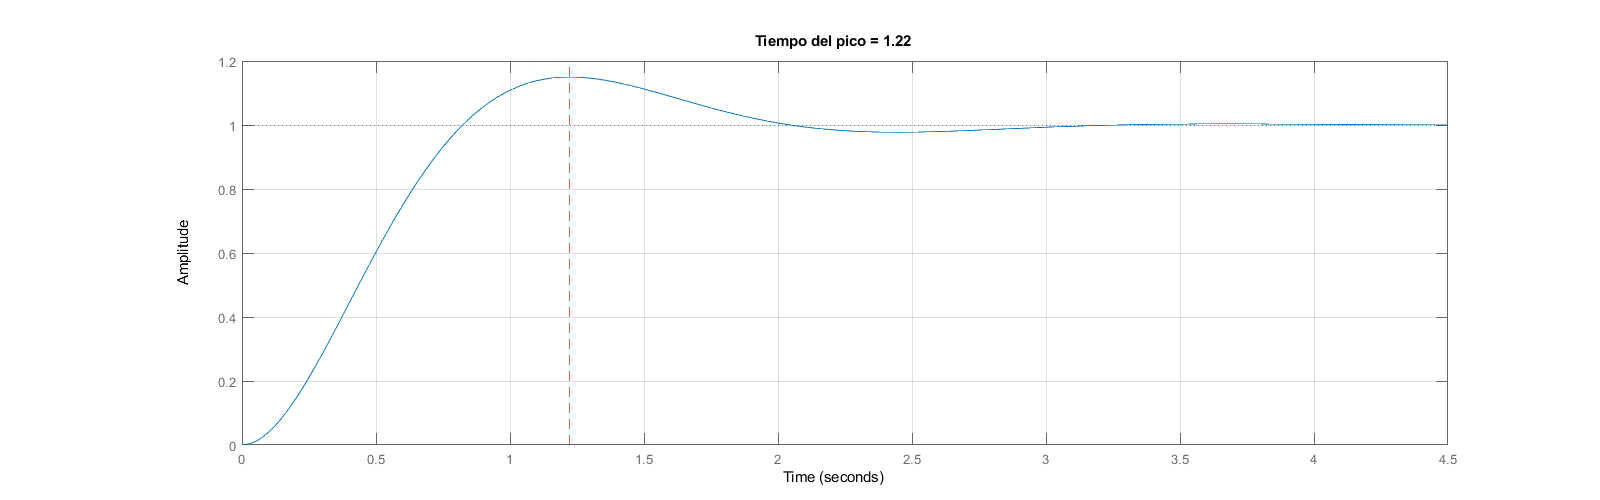

In [40]:
tiempo_pico = pi / frecuencia_amortiguada;
procentaje_overshoot = exp(-zeta * pi / sqrt(1 - zeta^2));

figure;
step(segundo_orden)
xline(tiempo_pico,'--r');
title("Tiempo del pico = " + num2str(round(tiempo_pico, 2)))
grid on

### Tiempo del segundo pico

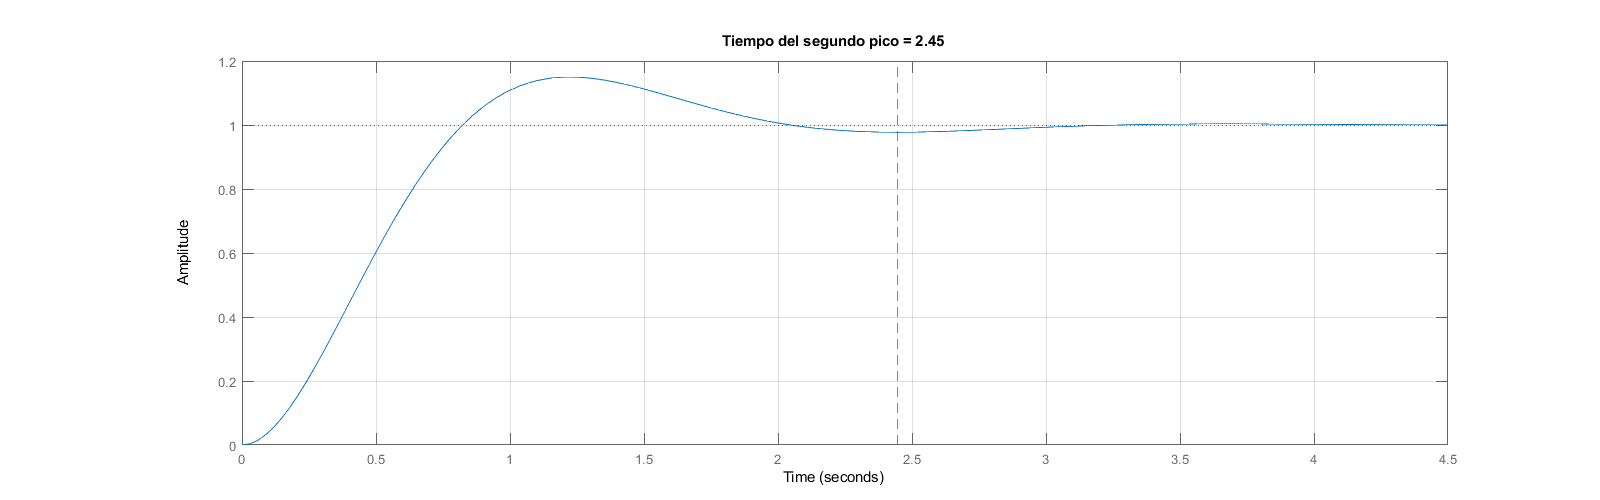

In [41]:
tiempo_segundo_pico = 2*pi / frecuencia_amortiguada;

figure;
step(segundo_orden)
xline(tiempo_segundo_pico,'--r');
title("Tiempo del segundo pico = " + num2str(round(tiempo_segundo_pico, 2)))
grid on

### Tiempo de Asentamiento

Al 5\%

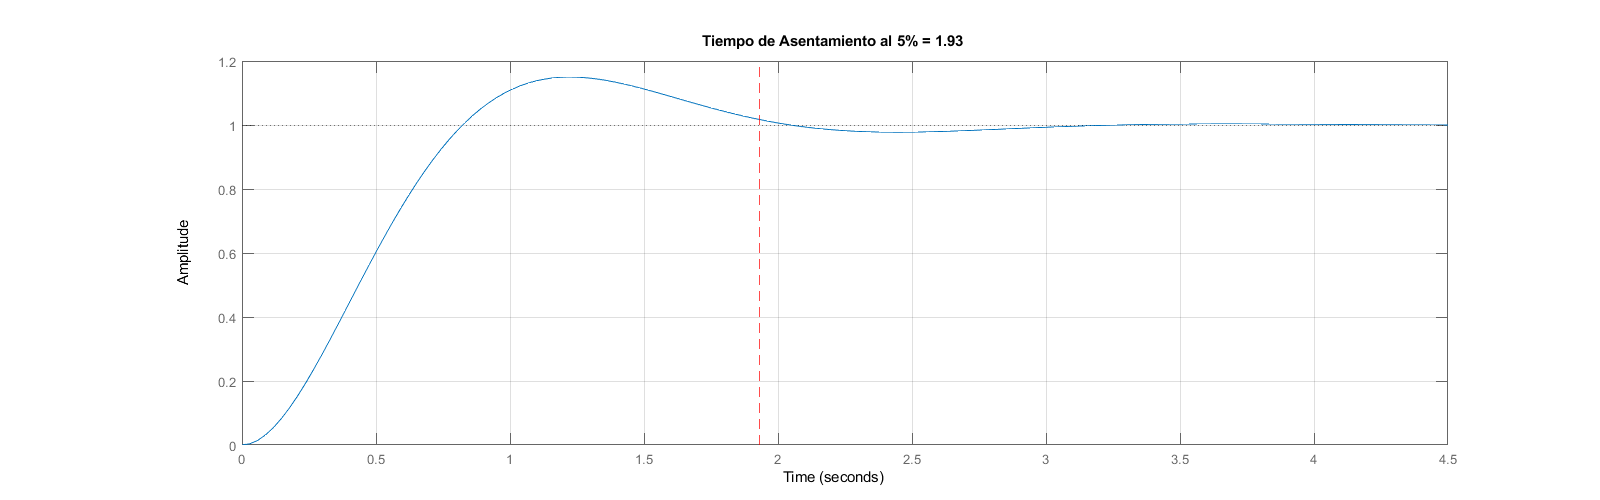

In [42]:
porcentaje_acentamiento = 5;

tiempo_asentamiento = -log(porcentaje_acentamiento/100) / (zeta * omega);

figure;
step(segundo_orden)
xline(tiempo_asentamiento,'--r');
title("Tiempo de Asentamiento al 5% = " + num2str(round(tiempo_asentamiento, 2)))
grid on

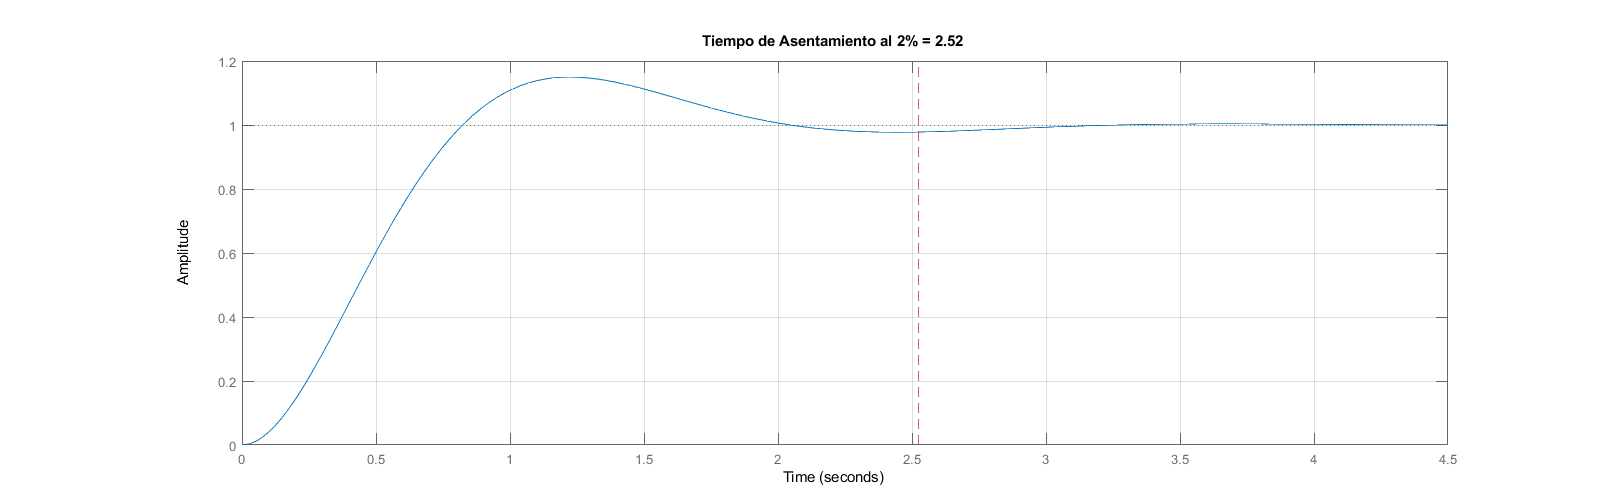

In [43]:
porcentaje_acentamiento = 2;

tiempo_asentamiento = -log(porcentaje_acentamiento/100) / (zeta * omega);

figure;
step(segundo_orden)
xline(tiempo_asentamiento,'--r');
title("Tiempo de Asentamiento al 2% = " + num2str(round(tiempo_asentamiento, 2)))
grid on

### Consideraciones

La frecuencia natural **no afecta el overshoot**

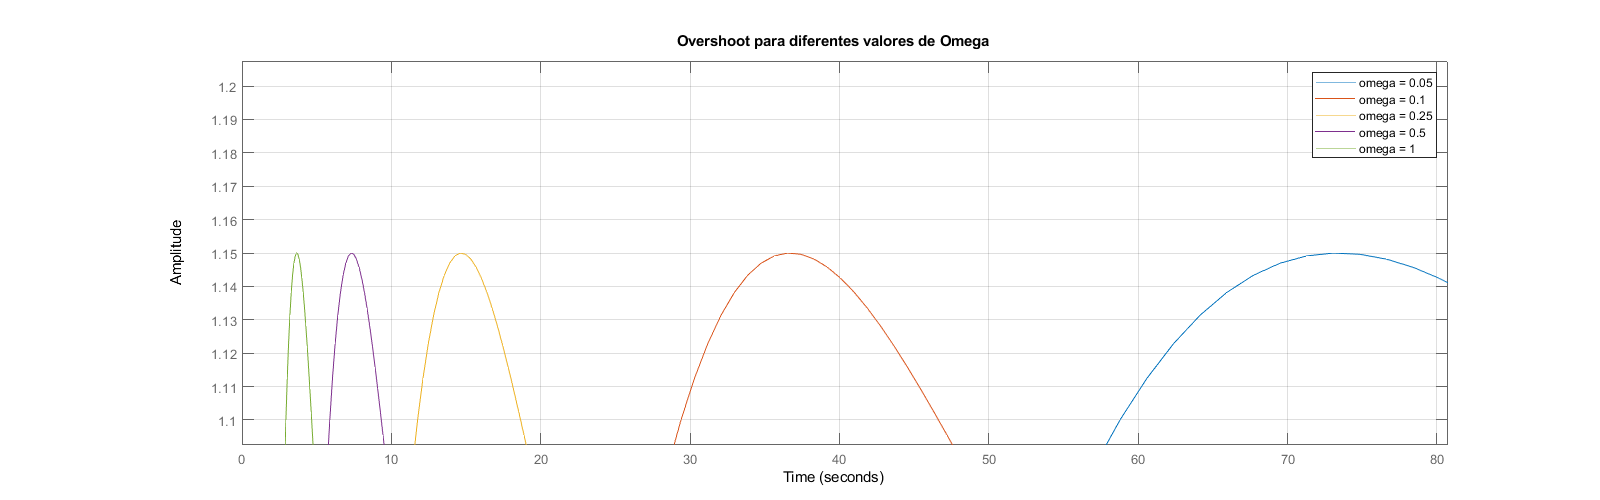

In [23]:
figure;

omega_values = [0.05, 0.10, 0.25, 0.50, 1.00];
for index = 1:length(omega_values)
    omega_ = omega_values(index);
    segundo_orden = (omega_^2) / (s^2 + 2*omega_*zeta*s + omega_^2);
    step(segundo_orden)
    legendInfo{index} = ['omega = ' num2str(omega_)]; 
    hold all
end

legend(legendInfo)
frecuencia_amortiguada = 0.05 * sqrt(1 - zeta^2); % Omega mínimo
tiempo_pico = pi / frecuencia_amortiguada;
xlim([0 tiempo_pico*1.1])

overshoot_magnitud = 1 * (1 + PO/100); % Asumiendo step = 1
ylim([overshoot_magnitud*0.95 overshoot_magnitud*1.05]) % Overshoot ± 5%

title("Overshoot para diferentes valores de Omega")
grid on

## Polos y Zeros

Para el sistema original

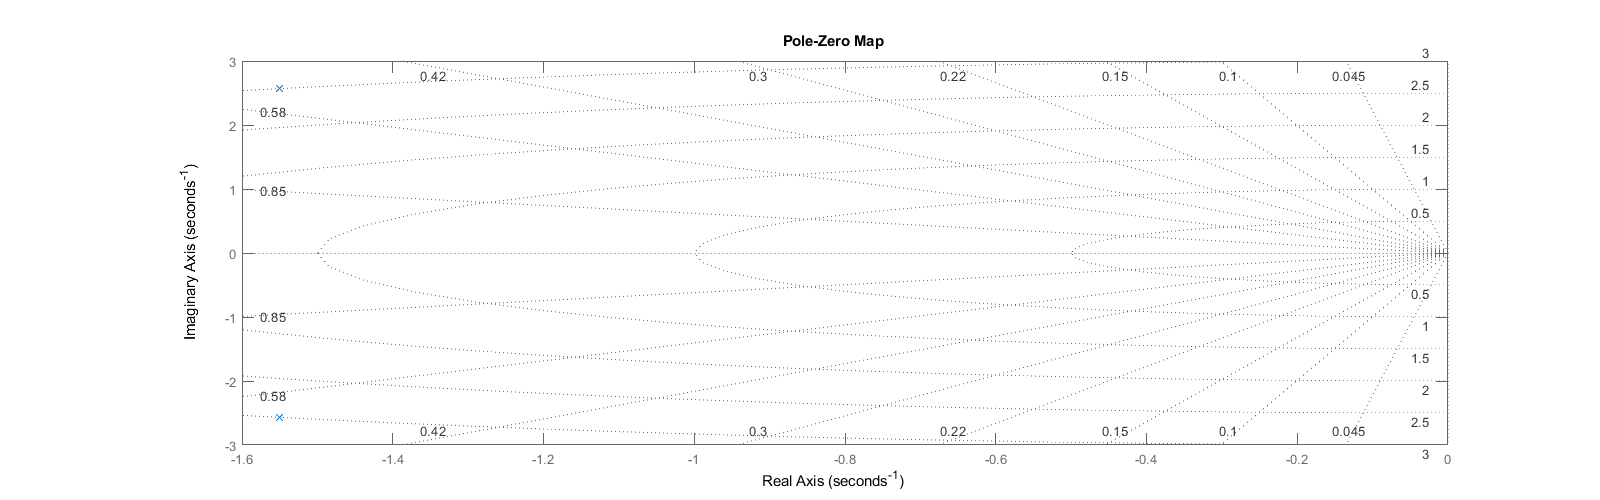

In [24]:
segundo_orden = omega^2 / (s^2 + 2*omega*zeta*s + omega^2);

figure;
pzmap(segundo_orden)
grid on

En el caso de tener distintos valores de la frecuencia natural, los polos se ubican sobre la recta que está a cos(zeta) grados del eje real

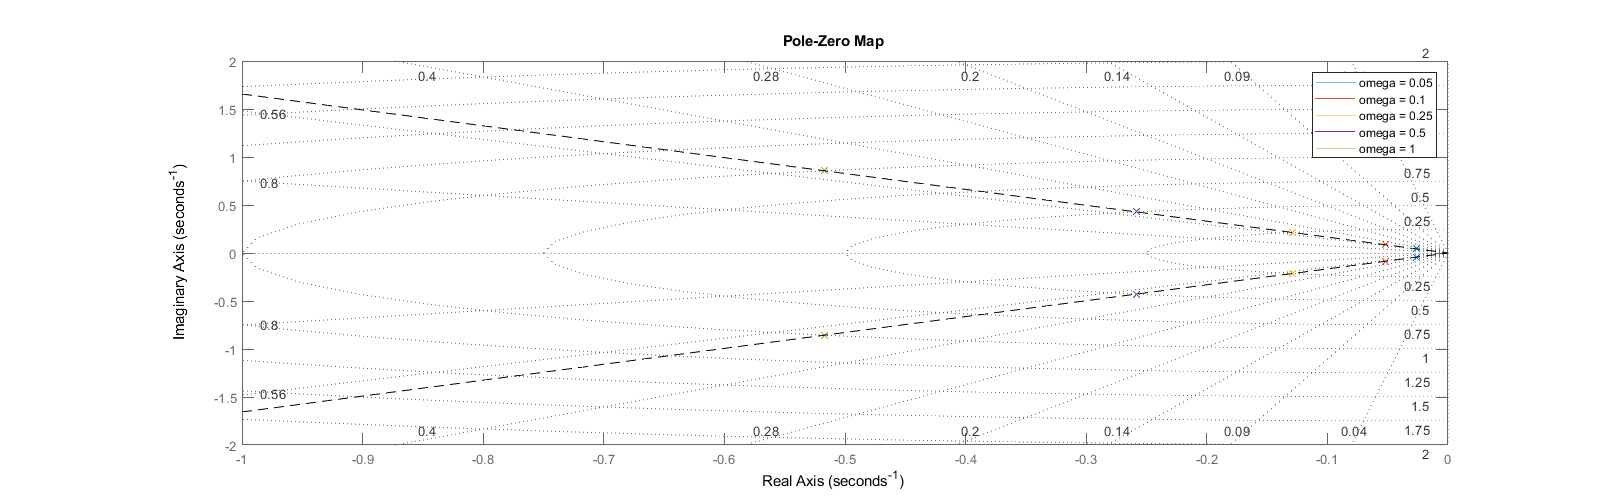

In [25]:
figure;
omega_values = [0.05, 0.10, 0.25, 0.50, 1.00];
for index = 1:length(omega_values)
    omega_ = omega_values(index);
    segundo_orden = (omega_^2) / (s^2 + 2*omega_*zeta*s + omega_^2);
    pzmap(segundo_orden)
    legendInfo{index} = ['omega = ' num2str(omega_)]; 
    hold all
end
legend(legendInfo, 'AutoUpdate', 'off')

% Rectas 

m = tan(angulo_polo); 
x = linspace(-1, 0);
plot(x, m*x, '--', "Color", [0 0 0])
plot(x, -m*x, '--', "Color", [0 0 0])
grid on

## Referencias

* [1] Ingenieria de Control - 2da edicion - William Bolton - 2001

<br><nav style="display: flex; justify-content: space-between;">
    <a href="https://elc.github.io/link/control_03"><img src="https://img.shields.io/badge/%20%20%3C%20Previous%20Chapter--grey?style=for-the-badge"></a>
    <a href="https://elc.github.io/link/control_05"><img src="https://img.shields.io/badge/Next%20Chapter%20%3E--grey?style=for-the-badge"></a>
</nav>